<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장. 다양한 분류 알고리즘: 럭키백의 확률을 계산하라!

---
## 4-1. 로지스틱 회귀

---



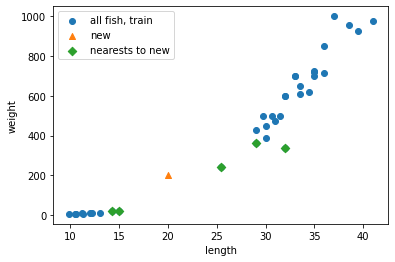

In [ ]:
from bream_smelt import *
# original data: bit.ly/bream_list, bit.ly/smelt_list

import numpy as np

fish_length = np.array(bream_length + smelt_length)
fish_weight = np.array(bream_weight + smelt_weight)
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.array([1] * 35 + [0] * 14)

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
new = np.array([20, 200])
distances, indices = kn.kneighbors([new])

import matplotlib.pyplot as plt

plt.scatter(*train_input.T, label='all fish, train')
plt.scatter(*new.T, marker='^', label='new')
plt.scatter(*train_input[indices, :].T, marker='D', label='nearests to new')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

AttributeError: ignored

---

## 4-2. 확률적 경사 하강법

---

In [ ]:
# 데이터를 불러옴
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

# 입력은 Species를 제외한 나머지 5개 컬럼, Species는 타겟
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 입력은 Species를 제외한 나머지 5개 컬럼, Species는 타겟
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 확률적 경사 하강법은 SGDClassifier를 사용함
# SGD = Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(f'훈련 세트 점수: {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

훈련 세트 점수: 0.773109243697479
테스트 세트 점수: 0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# SGD는 SGDClassifier 객체를 새로 만들지 않고 데이터만 추가할 수 있음
# partial_fit() 메서드를 사용
sc.partial_fit(train_scaled, train_target) # 에포크를 한 번 더 실행한 것과 같음
print(f'훈련 세트 점수: {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

# 참고: SGDClassifier에 train_scaled 전체를 전달했지만
#      실제로는 내부적으로 샘플을 1개씩 꺼내서 SGD를 수행함
#      따라서 배치 경사 하강법이 아님
#      SGDClassifier는 미니배치나 배치 하강법은 제공하지 않음

훈련 세트 점수: 0.8151260504201681
테스트 세트 점수: 0.85


AttributeError: ignored

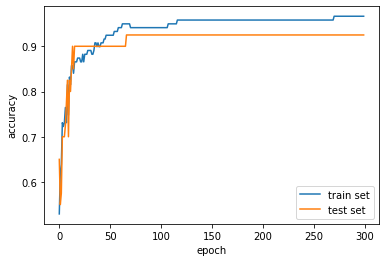

In [ ]:
# 에포크 횟수가 적으면 충분한 학습을 못하므로 과소적합이 될 수 있음
# 에포크 횟수가 많으면 훈련 세트에 과하게 맞춰져서 과대적합이 될 수 있음
# 그래프로 확인해보자

import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

# 300 에포크를 돌면서 훈련 세트와 테스트 세트의 점수를 보겠음
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    # Q1. fit()을 안하고 처음부터 partial_fit을 해도 되네?
    # Q2. classes는 왜 하는거지?
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score, label='train set')
plt.plot(test_score, label='test set')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
print(plt.get_visible
plt.show()
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

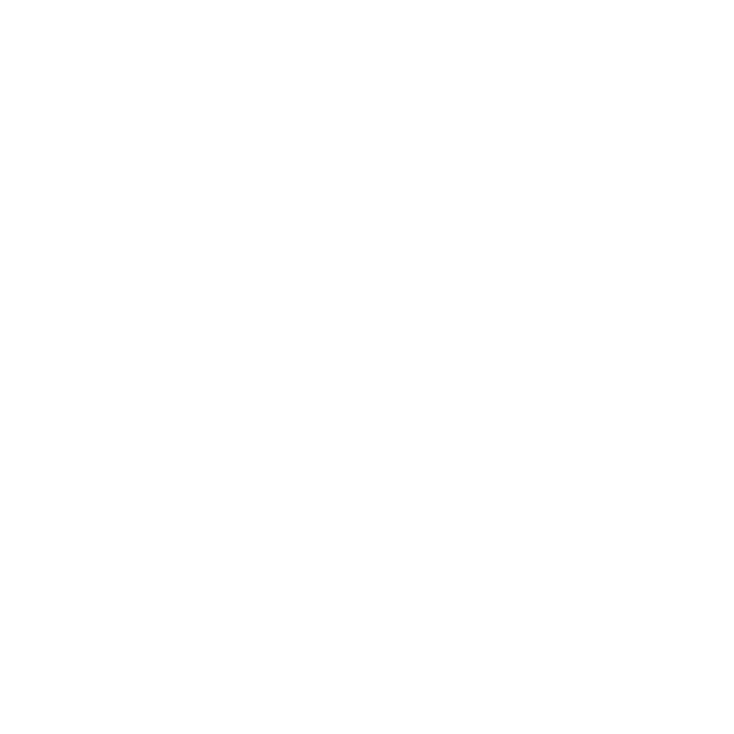

In [ ]:
from google.colab import files
import matplotlib
matplotlib.use('Agg')
plt.figure(figsize=(10, 10))
plt.gca().set_visible(False)
plt.plot(train_score, label='train set')
plt.plot(test_score, label='test set')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("abc.png")
files.download("abc.png")
